In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from os.path import join
from unet_src.fast_inference import UnetV2FastApplier

%matplotlib inline

In [2]:
# inference params
device_id = 0  # GPU device id 
images_path = '/sly_task_data/img/' # it could be one image or directory with several images

In [3]:
settings = {"device_id": 0}
applier = UnetV2FastApplier(settings)

{"message": "Will init all required to inference.", "timestamp": "2018-09-09T08:10:05.544Z", "level": "info"}
{"message": "Model input size is read (for auto-rescale).", "input_size": {"width": 256, "height": 256}, "timestamp": "2018-09-09T08:10:05.549Z", "level": "info"}
{"message": "Read model internal class mapping", "class_mapping": {"bg": 0, "road_edges_bm": 255, "road": 1}, "timestamp": "2018-09-09T08:10:05.551Z", "level": "info"}
{"message": "Read model out classes", "classes": [{"title": "bg", "shape": "bitmap", "color": "#d5b4bc"}, {"title": "road", "shape": "bitmap", "color": "#F6FF00"}], "timestamp": "2018-09-09T08:10:05.553Z", "level": "info"}
{"message": "Will construct model.", "timestamp": "2018-09-09T08:10:05.555Z", "level": "info"}
{"message": "Model has been constructed (w/out weights).", "timestamp": "2018-09-09T08:10:15.132Z", "level": "info"}
{"message": "Model has been loaded into GPU(s).", "remapped_device_ids": [0], "timestamp": "2018-09-09T08:10:17.466Z", "leve

In [4]:
def get_imgs_list(path):
    if os.path.isdir(path):
        imgs_list = [join(path, fp) for fp in os.listdir(path)]
    else:
        imgs_list = [path]
    return imgs_list

In [5]:
# Get images list# Get i 
imgs_list = get_imgs_list(images_path)

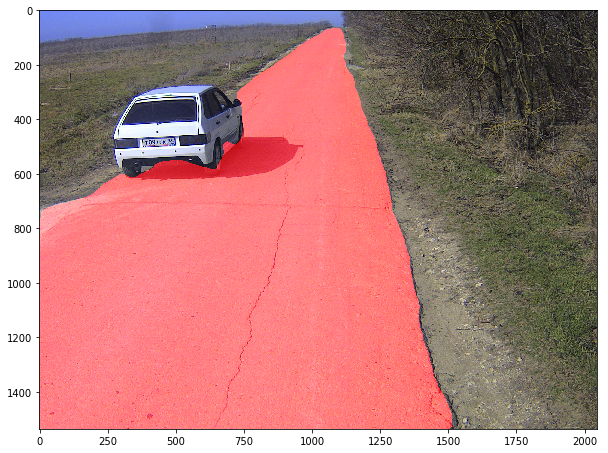

In [15]:
for img_fp in imgs_list:
    image = cv2.imread(img_fp)
    if image is None:
        print('Something wrong with image: {}'.format(img_fp))
        break
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = applier.inference(image)
    blank_mask = np.zeros((image.shape[0], image.shape[1], 3)).astype('uint8')
    for obj in mask["objects"]:
        if obj.class_title == 'road':
            obj.draw(blank_mask, [255, 0, 0])
    res = cv2.addWeighted(image, 1, blank_mask, 0.7, 0)
    plt.figure(figsize=(10, 10))
    plt.imshow(res)
    plt.show()